In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

print("Imported!")

Imported!


In [2]:
pact_ww = pd.read_csv("pact+pinfo.csv", sep="|")
print pact_ww.columns
sess_ww = pd.read_csv("sess+pinfo.csv", sep="|")
print sess_ww.columns
pinfo_ww = pd.read_csv("pinfo_ww.csv", sep="|")
print pinfo_ww.columns
print "Readed!"

Index([u'Unnamed: 0', u'id', u'actdate', u'actdate_num', u'actflag',
       u'payflag', u'pgrflag', u'ml_num', u'transactions', u'quests_end',
       u'm_quests_end', u'days_from_last_actdate', u'days_from_last_payment',
       u'utc_timestamp', u'gender', u'birthyear', u'country', u'region',
       u'city', u'traffic', u'traftype'],
      dtype='object')
Index([u'Unnamed: 0', u'id', u'session_number', u'session_length',
       u'startsession_time', u'endsession_time', u'actdate', u'utc_timestamp',
       u'gender', u'birthyear', u'country', u'region', u'city', u'traffic',
       u'traftype'],
      dtype='object')
Index([u'id', u'utc_timestamp', u'gender', u'birthyear', u'country', u'region',
       u'city', u'traffic', u'traftype'],
      dtype='object')
Readed!


city            country
Köln            DE          504
Leipzig         DE          515
Jakarta         ID          523
Birmingham      GB          567
Athens          GR          583
Rio De Janeiro  BR          602
Bucharest       RO          628
Montréal        CA          732
Paris           FR          744
Montevideo      UY          760
Buenos Aires    AR          778
Belgrade        RS          794
São Paulo       BR          830
Warsaw          PL          919
Bangkok         TH          927
Istanbul        TR          977
Hamburg         DE         1137
London          GB         1344
Berlin          DE         1824
Hanoi           VN         1838
dtype: int64
32807


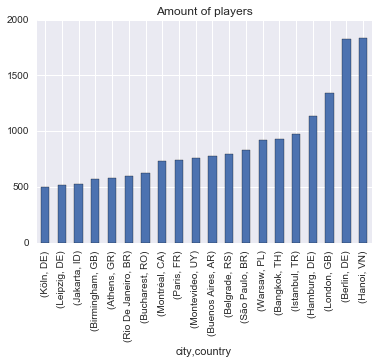

In [3]:
#количество игроков;
table_count_players = pinfo_ww.groupby(['city','country']).size()
table_count_players.sort_values(inplace=True)
table_count_players.sort_values().tail(20).plot(kind='bar', title="Amount of players")
print table_count_players.tail(20)
print len(table_count_players)

In [4]:
#количество игроков в среднем (mean);
table_count_players_mean = pinfo_ww.groupby(['city','country']).size().mean()
print table_count_players_mean

7.62812814338


In [5]:
#количество игроков в среднем (median);
table_count_players_mean = pinfo_ww.groupby(['city','country']).size().median()
print table_count_players_mean

2.0


city        count_players  country
Istanbul    977            TR          3648
Manchester  604            GB          3664
Liège       429            BE          3686
Birmingham  667            GB          4086
Athens      685            GR          4246
Düsseldorf  264            DE          4333
Warsaw      985            PL          4405
Belgrade    795            RS          4468
Milan       491            IT          4509
Hanoi       1838           VN          4701
Leipzig     515            DE          4748
Vienna      447            AT          5023
Montréal    732            CA          5242
Munich      471            DE          5444
Köln        504            DE          6378
Paris       831            FR          7361
London      1555           GB          9205
Moscow      430            RU         11417
Hamburg     1165           DE         13347
Berlin      1851           DE         20036
Name: transactions, dtype: int64


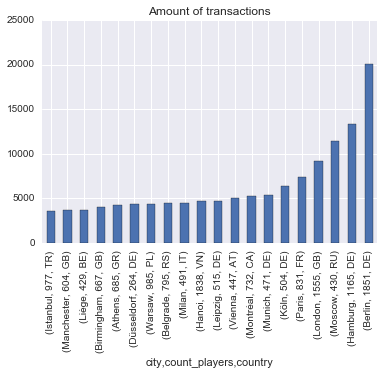

In [6]:
#количество платежей (transactions);
table_transactions = pact_ww.groupby(['city','country']).transactions.size()
table_transactions = table_transactions.rename('transactions')

#Высчитываем количество играков в каждом городе 
table_count_players = pinfo_ww.groupby(['city']).size()
table_count_players = table_count_players.rename('count_players')
table_count_players = table_count_players.reset_index(['city','country'])

#Добавляем количество игроков в каждом городе в искомую таблицу

table_transactions = table_transactions.reset_index(['city','country'])

table_transactions = pd.merge(table_transactions, table_count_players, how='inner', on=['city'])
#print table_transactions.columns
table_transactions = table_transactions.sort_values(by='transactions')
table = table_transactions.pivot_table(index=['city','count_players','country'], values='transactions')
table = table.sort_values()
print table.tail(20)
table.tail(20).plot(kind='bar', title="Amount of transactions")

city          count_players  country
Toronto       399            CA          90
Philadelphia  409            US          98
Leipzig       515            DE         100
Chicago       403            US         101
Melbourne     286            AU         102
Glasgow       442            GB         106
Leeds         360            GB         112
Edinburgh     194            GB         122
Bristol       447            GB         125
Southampton   228            GB         125
Adelaide      172            AU         134
Hamburg       1165           DE         136
Sheffield     338            GB         144
Paris         831            FR         146
Birmingham    667            GB         158
Nottingham    389            GB         172
Liverpool     404            GB         190
Manchester    604            GB         278
Berlin        1851           DE         280
London        1555           GB         344
Name: transactions_sum, dtype: int64


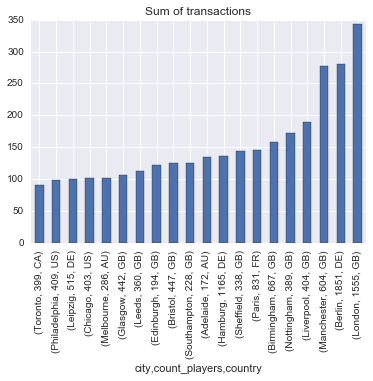

In [7]:
#сумма платежей (transactions);
table_transactions_sum = pact_ww.groupby(['city','country']).transactions.sum()
table_transactions_sum = table_transactions_sum.rename('transactions_sum')

#Высчитываем количество играков в каждом городе 
table_count_players = pinfo_ww.groupby(['city']).size()
table_count_players = table_count_players.rename('count_players')
table_count_players = table_count_players.reset_index(['city','country'])

#Добавляем количество игроков в каждом городе в искомую таблицу

table_transactions_sum = table_transactions_sum.reset_index(['city','country'])

table_transactions_sum = pd.merge(table_transactions_sum, table_count_players, how='inner', on=['city'])
#print table_transactions_sum.columns
table_transactions_sum = table_transactions_sum.sort_values(by='transactions_sum')
table = table_transactions_sum.pivot_table(index=['city','count_players','country'], values='transactions_sum')
table = table.sort_values()
print table.tail(20)
table.tail(20).plot(kind='bar', title="Sum of transactions")

city                     count_players  country
Skjervøy                 1              NO         2.333333
Baisden                  1              US         2.333333
White Cloud              2              US         2.333333
Ugerløse                 2              DK         2.400000
Hockley                  4              GB         2.444444
Eliot                    2              US         2.500000
Fleurieux                1              FR         2.500000
Vosne-romanée            1              FR         2.500000
Wilsden                  1              GB         2.500000
Krimpen                  1              NL         2.500000
Ringoes                  1              US         2.833333
Saint-laurent-d'aigouze  2              FR         3.000000
Bud                      1              NO         3.000000
Vouzan                   1              FR         3.000000
Mount Currie             1              CA         3.000000
Watford City             1              US         3

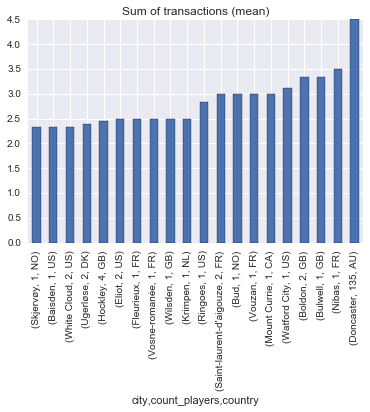

In [8]:
#сумма платежей (transactions) (в среднем mean);
table_transactions_sum = pact_ww.groupby(['city','country']).transactions.mean()
table_transactions_sum = table_transactions_sum.rename('transactions_sum')

#Высчитываем количество играков в каждом городе 
table_count_players = pinfo_ww.groupby(['city']).size()
table_count_players = table_count_players.rename('count_players')
table_count_players = table_count_players.reset_index(['city','country'])

#Добавляем количество игроков в каждом городе в искомую таблицу

table_transactions_sum = table_transactions_sum.reset_index(['city','country'])

table_transactions_sum = pd.merge(table_transactions_sum, table_count_players, how='inner', on=['city'])
#print table_transactions_sum.columns
table_transactions_sum = table_transactions_sum.sort_values(by='transactions_sum')
table = table_transactions_sum.pivot_table(index=['city','count_players','country'], values='transactions_sum')
table = table.sort_values()
print table.tail(20)
table.tail(20).plot(kind='bar', title="Sum of transactions (mean)")

city                     count_players  country
Krimpen                  1              NL         2.0
Yatala                   1              AU         2.0
La Rabatelière           1              FR         2.0
Bolderslev               3              DK         2.0
Lardy                    1              FR         2.0
Eleele                   1              US         2.0
Cintegabelle             3              FR         2.0
Saint-agnan-le-malherbe  1              FR         2.0
Bostic                   1              US         2.0
Delphia                  1              US         2.5
Vosne-romanée            1              FR         2.5
Wilsden                  1              GB         2.5
Saint-laurent-d'aigouze  2              FR         3.0
Mount Currie             1              CA         3.0
Bud                      1              NO         3.0
Greåker                  2              NO         3.0
Vouzan                   1              FR         3.0
Nibas            

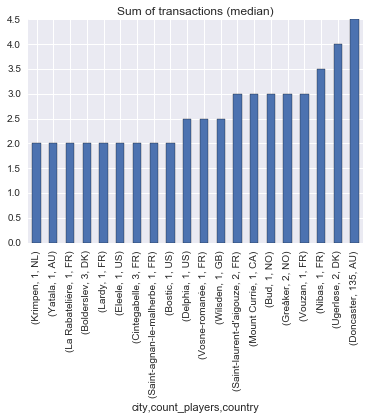

In [9]:
#сумма платежей (transactions) (в среднем median);
table_transactions_sum = pact_ww.groupby(['city','country']).transactions.median()
table_transactions_sum = table_transactions_sum.rename('transactions_sum')

#Высчитываем количество играков в каждом городе 
table_count_players = pinfo_ww.groupby(['city']).size()
table_count_players = table_count_players.rename('count_players')
table_count_players = table_count_players.reset_index(['city','country'])

#Добавляем количество игроков в каждом городе в искомую таблицу

table_transactions_sum = table_transactions_sum.reset_index(['city','country'])

table_transactions_sum = pd.merge(table_transactions_sum, table_count_players, how='inner', on=['city'])
#print table_transactions_sum.columns
table_transactions_sum = table_transactions_sum.sort_values(by='transactions_sum')
table = table_transactions_sum.pivot_table(index=['city','count_players','country'], values='transactions_sum')
table = table.sort_values()
print table.tail(20)
table.tail(20).plot(kind='bar', title="Sum of transactions (median)")

city          count_players  country
Manchester    604            GB          23907
Milan         491            IT          23908
São Paulo     830            BR          24996
Buenos Aires  778            AR          25334
Birmingham    667            GB          25640
Bangkok       927            TH          26317
Istanbul      977            TR          26345
Belgrade      795            RS          27086
Leipzig       515            DE          28187
Montréal      732            CA          29139
Vienna        447            AT          29211
Munich        471            DE          30784
Warsaw        985            PL          30989
Köln          504            DE          34428
Paris         831            FR          44358
Hanoi         1838           VN          48386
London        1555           GB          61215
Hamburg       1165           DE          75194
Berlin        1851           DE         113300
Moscow        430            RU         255139
Name: quests_end, dtype

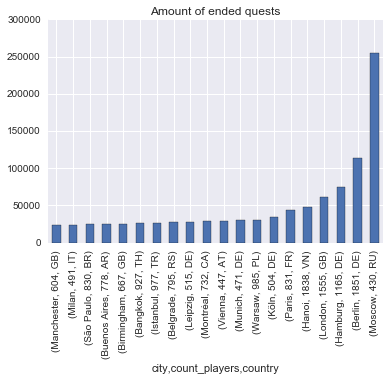

In [10]:
#количество пройденных квестов;
table_quests_end = pact_ww.groupby(['city','country']).quests_end.sum()
table_quests_end.sort_values(inplace='True')

#Высчитываем количество играков в каждом городе 
table_count_players = pinfo_ww.groupby(['city']).size()
table_count_players = table_count_players.rename('count_players')
table_count_players = table_count_players.reset_index(['city','country'])

#Добавляем количество игроков в каждом городе в искомую таблицу

table_quests_end = table_quests_end.reset_index(['city','country'])

table_quests_end = pd.merge(table_quests_end, table_count_players, how='inner', on=['city'])
#print table_quests_end.columns
table_quests_end = table_quests_end.sort_values(by='quests_end')
table = table_quests_end.pivot_table(index=['city','count_players','country'], values='quests_end')
table = table.sort_values()

print table.tail(20)
table.tail(20).plot(kind='bar', title="Amount of ended quests")

city                   count_players  country
Boeicop                1              NL          85.0
Big Prairie            1              US          85.0
Jászalsószentgyörgy    1              HU          85.0
Saint-vaast-la-hougue  1              FR          85.0
Klemme                 1              US          85.0
Helensvale             1              AU          85.0
Bang Hak               1              TH          85.0
Colpo                  1              FR          86.0
Obregon                1              MX          86.0
Niederaula             1              DE          89.0
Benicasim              1              ES          90.0
Montfort               1              FR          91.0
Borkum                 2              DE          91.5
Cordenons              2              IT          92.0
Brand-erbisdorf        1              DE          95.0
Renneville             1              FR          97.0
Realmonte              1              IT         107.0
Scordia            

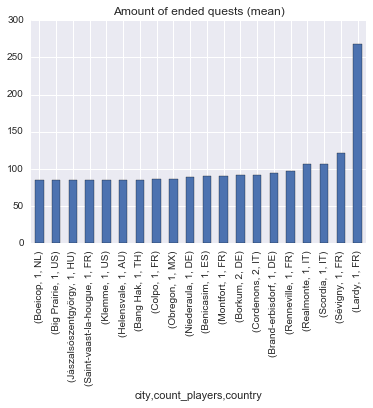

In [11]:
#количество пройденных квестов (в среднем mean);
table_quests_end = pact_ww.groupby(['city','country']).quests_end.mean()
table_quests_end.sort_values(inplace='True')
#Высчитываем количество играков в каждом городе 
table_count_players = pinfo_ww.groupby(['city']).size()
table_count_players = table_count_players.rename('count_players')
table_count_players = table_count_players.reset_index(['city','country'])

#Добавляем количество игроков в каждом городе в искомую таблицу
table_quests_end = table_quests_end.reset_index(['city','country'])

table_quests_end = pd.merge(table_quests_end, table_count_players, how='inner', on=['city'])
#print table_quests_end.columns
table_quests_end = table_quests_end.sort_values(by='quests_end')
table = table_quests_end.pivot_table(index=['city','count_players','country'], values='quests_end')
table = table.sort_values()

print table.tail(20)
table.tail(20).plot(kind='bar', title="Amount of ended quests (mean)")

city                   count_players  country
Bang Hak               1              TH          85.0
Klemme                 1              US          85.0
Jászalsószentgyörgy    1              HU          85.0
Helensvale             1              AU          85.0
Saint-vaast-la-hougue  1              FR          85.0
Obregon                1              MX          86.0
Colpo                  1              FR          86.0
Delphia                1              US          88.0
Niederaula             1              DE          89.0
Benicasim              1              ES          90.0
Montfort               1              FR          91.0
Borkum                 2              DE          91.5
Cordenons              2              IT          92.0
Greåker                2              NO          93.0
Brand-erbisdorf        1              DE          95.0
Renneville             1              FR          97.0
Realmonte              1              IT         107.0
Scordia            

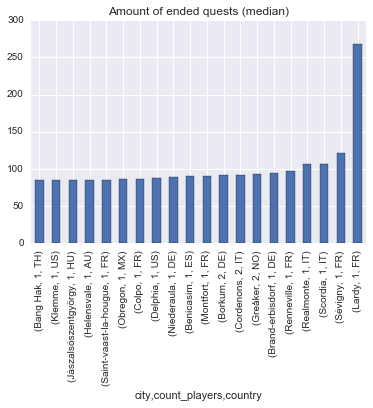

In [12]:
#количество пройденных квестов (в среднем median);
table_quests_end = pact_ww.groupby(['city','country']).quests_end.median()
table_quests_end.sort_values(inplace='True')

#Высчитываем количество играков в каждом городе 
table_count_players = pinfo_ww.groupby(['city']).size()
table_count_players = table_count_players.rename('count_players')
table_count_players = table_count_players.reset_index(['city','country'])

#Добавляем количество игроков в каждом городе в искомую таблицу

table_quests_end = table_quests_end.reset_index(['city','country'])

table_quests_end = pd.merge(table_quests_end, table_count_players, how='inner', on=['city'])
#print table_quests_end.columns
table_quests_end = table_quests_end.sort_values(by='quests_end')
table = table_quests_end.pivot_table(index=['city','count_players','country'], values='quests_end')
table = table.sort_values()

print table.tail(20)
table.tail(20).plot(kind='bar', title="Amount of ended quests (median)")

city          count_players  country
Brasília      114            BR          684.445194
Saint Louis   270            US          686.185096
Johannesburg  146            ZA          720.661796
Nottingham    384            GB          725.880110
Atlanta       150            US          727.435930
Bradford      180            GB          739.871691
Las Vegas     365            US          843.324588
Salem         188            US          929.501268
New York      223            US          930.736689
Cardiff       160            GB          950.678660
Springfield   410            US         1031.772383
San Antonio   226            US         1099.869552
Swansea       119            GB         1424.349428
Santiago      312            CL         1509.014657
Dresden       307            DE         1578.170075
Belgrade      794            RS         1665.928083
Vienna        434            AT         1741.238419
Franklin      112            US         1765.431966
Portland      430          

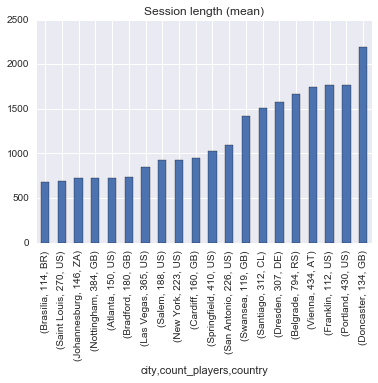

In [13]:
#длина сессии (средняя mean);
table_session_length_mean = sess_ww.groupby(['city','country']).session_length.mean()
table_session_length_mean = table_session_length_mean.reset_index('city')

table_count_players = pinfo_ww.groupby(['city','country']).size()
table_count_players = table_count_players.rename('count_players')
table_count_players = table_count_players.reset_index(['city','country'])

table_session_length_mean = pd.merge(table_session_length_mean, table_count_players, how='inner', on='city')
table_session_length_mean.sort_values(by = 'session_length', inplace=True)
# удаляем выбросы (города количество людей в которых не превышает 100 человек)
table_session_length_mean = table_session_length_mean[table_session_length_mean.count_players > 100]
table = table_session_length_mean.pivot_table(index=['city','count_players','country'], values='session_length')
table = table.sort_values()
print table.tail(20)
table.tail(20).plot(kind='bar', title='Session length (mean)')


city            count_players  country
Dhaka           226            BD         150.0
Seattle         271            US         150.0
Salvador        248            BR         155.0
Virginia Beach  121            US         161.5
Tbilisi         123            GE         162.0
Nashville       135            US         170.5
Manila          134            PH         171.0
Caracas         314            VE         174.0
Cairo           494            EG         175.0
Bandung         177            ID         177.0
Pensacola       122            US         177.0
Ramallah        231            PS         179.0
Atlanta         150            US         180.0
Oslo            114            NO         208.5
Karachi         108            PK         209.0
Adana           145            TR         211.0
Bursa           160            TR         216.0
Makati          125            PH         216.0
Brasília        114            BR         241.0
Hyderabad       195            IN         284.0
N

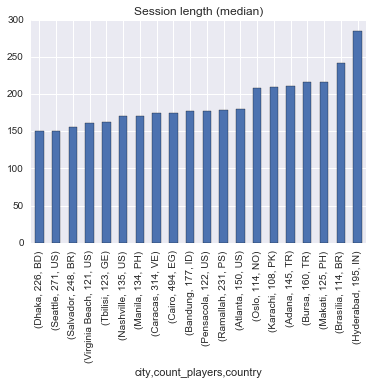

In [14]:
#длина сессии (средняя median);
table_session_length_meadian = sess_ww.groupby(['city']).session_length.median()
table_session_length_meadian = table_session_length_meadian.reset_index('city')

#Высчитываем количество играков в каждом городе 
table_count_players = pinfo_ww.groupby(['city','country']).size()
table_count_players = table_count_players.rename('count_players')
table_count_players = table_count_players.reset_index(['city','country'])
#Добавляем количество игроков в каждом городе в искомую таблицу
table_session_length_meadian = pd.merge(table_session_length_meadian, table_count_players, how='inner', on='city')
table_session_length_meadian.sort_values(by = 'session_length', inplace=True)
# удаляем выбросы (города количество людей в которых не превышает 100 человек)
table_session_length_meadian = table_session_length_meadian[table_session_length_meadian.count_players > 100]
table = table_session_length_meadian.pivot_table(index=['city','count_players','country'], values='session_length')
table = table.sort_values()
print table.tail(20)
table.tail(20).plot(kind='bar', title='Session length (median)')


city        count_players  country
Istanbul    977            TR          3648
Manchester  604            GB          3664
Liège       429            BE          3686
Birmingham  667            GB          4086
Athens      685            GR          4246
Düsseldorf  264            DE          4333
Warsaw      985            PL          4405
Belgrade    795            RS          4468
Milan       491            IT          4509
Hanoi       1838           VN          4701
Leipzig     515            DE          4748
Vienna      447            AT          5023
Montréal    732            CA          5242
Munich      471            DE          5444
Köln        504            DE          6378
Paris       831            FR          7361
London      1555           GB          9205
Moscow      430            RU         11417
Hamburg     1165           DE         13347
Berlin      1851           DE         20036
Name: ml_num, dtype: int64


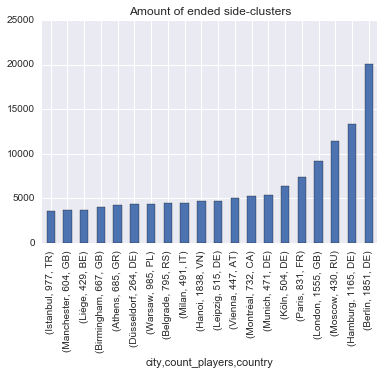

In [15]:
#количество пройденных сайд-кластеров;
#ml_num - Номер кластера основной сюжетной линии
table_ml_num = pact_ww.groupby(['city','country'], as_index=False).ml_num.size()
table_ml_num = table_ml_num.sort_values()
table_ml_num = table_ml_num.rename('ml_num')
table_ml_num = table_ml_num.reset_index(['city','country'])


#Высчитываем количество играков в каждом городе 
table_count_players = pinfo_ww.groupby(['city']).size()
table_count_players = table_count_players.rename('count_players')
table_count_players = table_count_players.reset_index(['city','country'])

#Добавляем количество игроков в каждом городе в искомую таблицу
table_ml_num = pd.merge(table_ml_num, table_count_players, how='inner', on='city')
table = table_ml_num.pivot_table(index=['city','count_players','country'], values='ml_num')
table = table.sort_values()

print table.tail(20)
table.tail(20).plot(kind = "bar", title="Amount of ended side-clusters")